In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow_datasets as tfds
from keras import models, layers, Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [3]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'data/Train',
    labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    batch_size=8,
    image_size=(224, 224),
    shuffle=True
)

Found 6003 files belonging to 2 classes.
Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [7]:
class_names = train_data.class_names
print(class_names)

['Fire', 'Non-Fire']


2023-06-25 23:45:05.036760: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


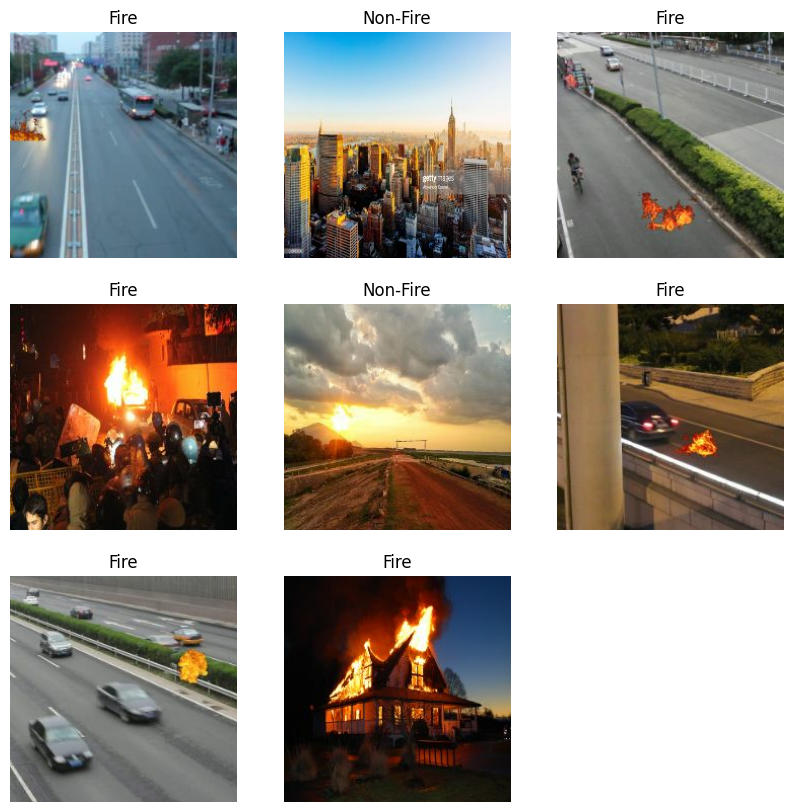

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(3):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[int(np.array(labels[i][0]))])

In [10]:
testing_data = tf.keras.utils.image_dataset_from_directory(
    'data/Test',
    labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    batch_size=8,
    image_size=(224, 224),
    shuffle=True
)

Found 2000 files belonging to 2 classes.


In [11]:
val_data = tf.keras.utils.image_dataset_from_directory(
    'data/Vali',
    labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    batch_size=8,
    image_size=(224, 224),
    shuffle=True
)

Found 2000 files belonging to 2 classes.


In [12]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(8, 224, 224, 3)
(8, 1)


In [13]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [31]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(224, 224, 3)),
  layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
  layers.MaxPool2D(),
  layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
  layers.MaxPool2D(),
  layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
  layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
  layers.MaxPool2D(),
  layers.Flatten(),
  layers.Dense(6, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(1, activation='sigmoid'),
])

In [34]:
#model.compile(optimizer='adam',
#             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#             metrics=['accuracy'])

model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [35]:
epochs=20
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/20
751/751 [==============================] - 48s 62ms/step - loss: 0.5232 - binary_accuracy: 0.7378 - val_loss: 0.4023 - val_binary_accuracy: 0.7840
Epoch 2/20
751/751 [==============================] - 45s 60ms/step - loss: 0.4091 - binary_accuracy: 0.8203 - val_loss: 0.4371 - val_binary_accuracy: 0.7550
Epoch 3/20
751/751 [==============================] - 45s 60ms/step - loss: 0.3466 - binary_accuracy: 0.8452 - val_loss: 0.3394 - val_binary_accuracy: 0.8175
Epoch 4/20
751/751 [==============================] - 45s 59ms/step - loss: 0.3007 - binary_accuracy: 0.8692 - val_loss: 0.3219 - val_binary_accuracy: 0.8415
Epoch 5/20
751/751 [==============================] - 51s 68ms/step - loss: 0.2476 - binary_accuracy: 0.8931 - val_loss: 0.3193 - val_binary_accuracy: 0.8590
Epoch 6/20
751/751 [==============================] - 57s 75ms/step - loss: 0.2044 - binary_accuracy: 0.9115 - val_loss: 0.3640 - val_binary_accuracy: 0.8490
Epoch 7/20
751/751 [==============================] 

In [36]:
model.save('saved_models/Model4')

INFO:tensorflow:Assets written to: saved_models/Model4/assets


INFO:tensorflow:Assets written to: saved_models/Model4/assets
